In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
from jax import numpy as jnp
from functools import partial
from main import diffusion_sampler_fn
from visualize import set_mpl, plot_hist, plot_estimator
set_mpl()

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

$$
dX_t = -\nabla F(X_t)dt + \sqrt{2\beta^{-1}}dW_t,\quad F(x) = 1 - \cos(5x) + 0.1x^2,\quad \beta=0.25
$$

In [3]:
def grad_fn(x):
    return -5 * jnp.sin(5 * x) - 0.2 * x

def beta_fn(x):
    return jnp.sqrt(0.5)

key = jax.random.PRNGKey(0)
x = jax.vmap(partial(diffusion_sampler_fn, drift_fn=grad_fn, diffusion_fn=beta_fn, dt=0.1, x0=15, num=1500), in_axes=(0), out_axes=0)(jax.random.split(key, 10000))

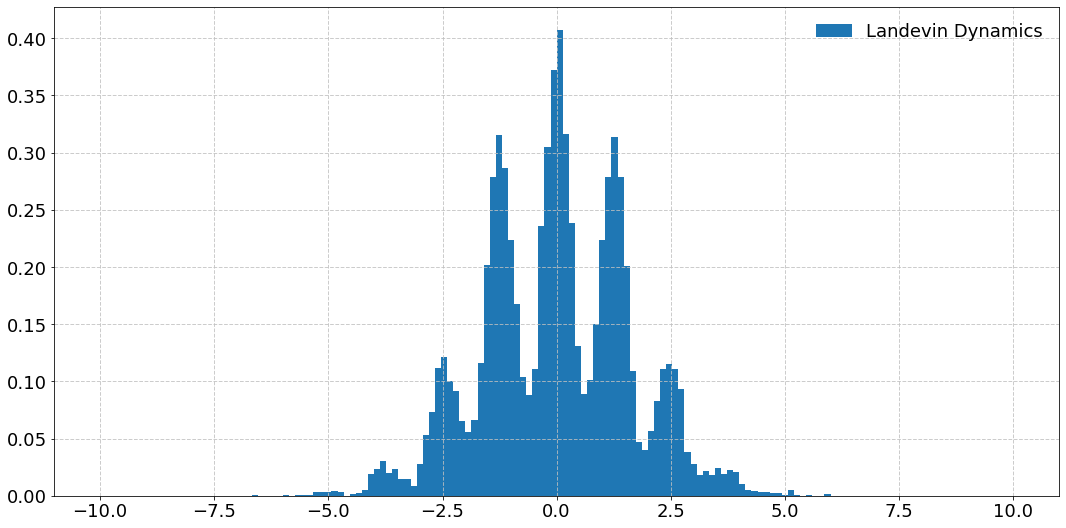

In [4]:
samples = np.array(x[:,-1])
plot_hist(samples, bins=150, label='Landevin Dynamics', x_range=(-10, 10))

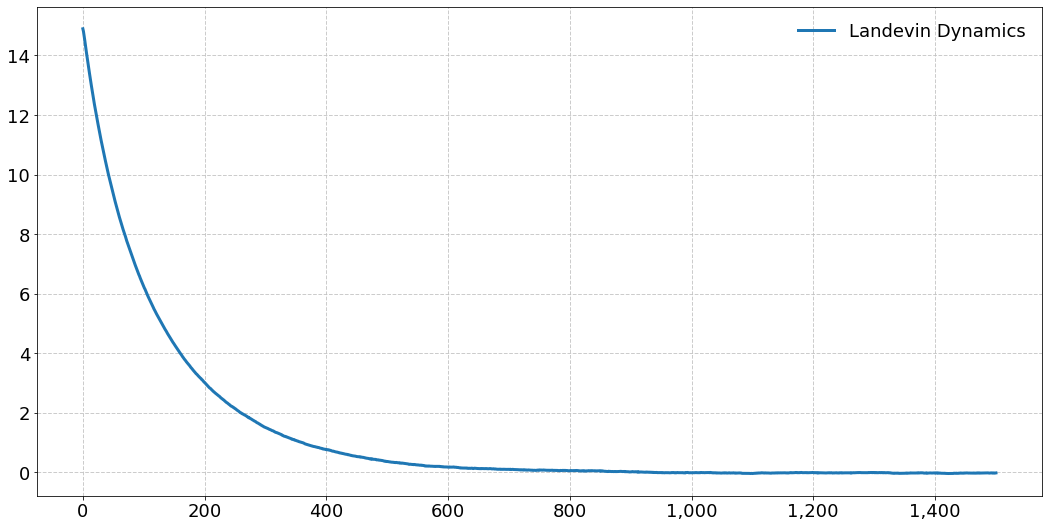

In [5]:
estimator = np.mean(x, axis=0)
plot_estimator(estimator, label='Landevin Dynamics')

$$
dY_t = b(Y_t)dt + \sigma(Y_t)dW_t,\quad b(x) = (1-x_1,1-x_2)^{\top},\quad \sigma(x) = (x_1, 1)^{\top}
$$

In [6]:
def b_fn(x):
    return jnp.array([-(x[0] - 1), -(x[1] - 1)])

def sigma_fn(x):
    return jnp.array([x[1], 1.]) 

key = jax.random.PRNGKey(0)
y = jax.vmap(partial(diffusion_sampler_fn, drift_fn=b_fn, diffusion_fn=sigma_fn, dt=0.1, x0=jnp.array([1., 1.]), num=500), in_axes=(0), out_axes=0)(jax.random.split(key, 10000))

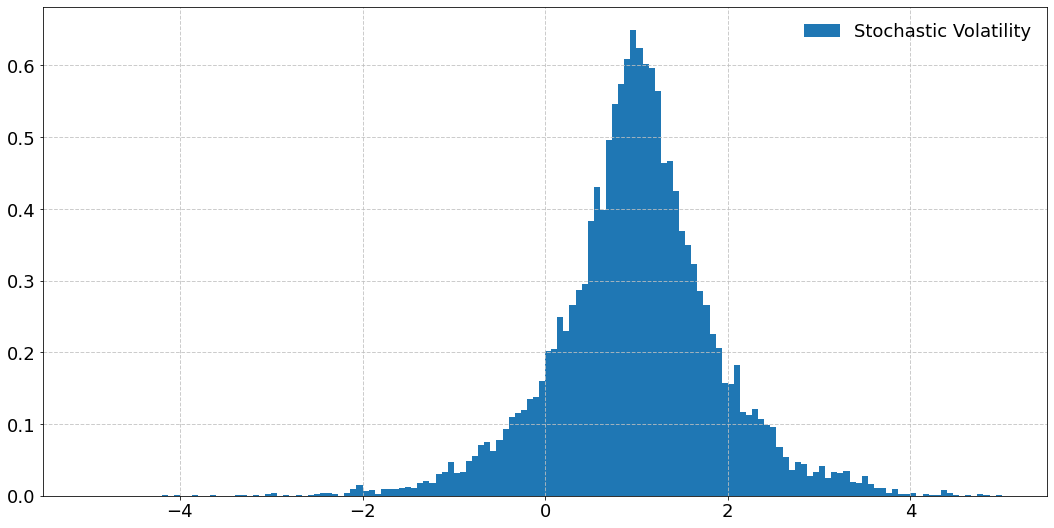

In [7]:
samples = np.array(y[:, -1][:, 0])
plot_hist(samples, bins=150, label='Stochastic Volatility', x_range=(-5, 5))